# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import glob
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import accuracy_score

### Setting Data set Path

In [2]:
Path = "D:\Dataset\Traffic Sign Detection"

### 2 list to store images and corresponding labels

In [29]:
X = []
Y = []
total_class = 43
cur_directory = os.getcwd()

In [18]:
os.listdir(Path)

['archive.zip', 'Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

In [140]:
print(Path)

D:\Dataset\Traffic Sign Detection


### Extracting Images and labels, storring it into X,Y

In [30]:
#The dataset has folders from 0–42 i.e. 43 classes
for index in range(total_class):
    img_path = os.path.join(Path,'train',str(index))
    #print(img_path)
    images = os.listdir(img_path)
    #print(images)
#iterating on all the images of the index folder
    for img in images:
        try:
            image = Image.open(img_path + '\\' + img)
            image = image.resize((30,30))
            image = np.array(image)
            X.append(image)
            Y.append(index)
        except:
            print('Error loading image')


(39209, 30, 30, 3) (39209,)


### Size of X and Y

In [143]:
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

(39209, 30, 30, 3) (39209,)


In [16]:
os.listdir(Path)

['archive.zip', 'Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

## Plotting random images from X 

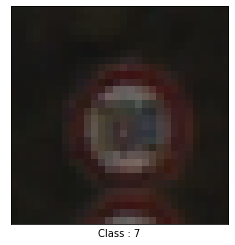

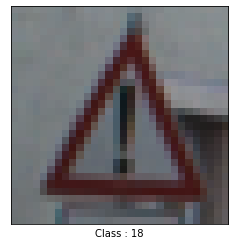

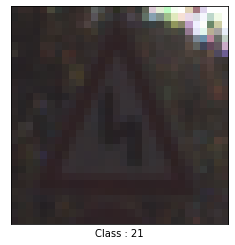

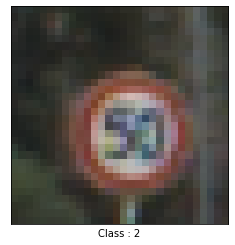

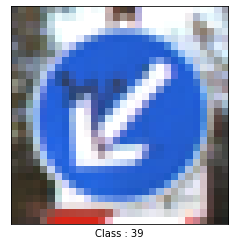

In [50]:
total_images = 39209

for i in range(5):
    n = random.randint(0,39209)
    image = X[n]
    plt.imshow(image)
    plt.xlabel("Class : " + str(Y[n]), fontcol)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

### Saving X,Y numpy array

In [10]:
#os.mkdir("Saved Weights")
os.chdir("Saved Weights")
np.save("X.npy",X)
np.save("Y.npy",Y)

### Loading X,Y from Saved Weights folder

In [4]:
print(os.getcwd())

C:\Users\sahib\OneDrive\Desktop\CB_ML\Traffic Sign Detection project


In [2]:
X = np.load("Saved Weights/X.npy")
Y = np.load("Saved Weights/Y.npy")

### Dividing data into test and train split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('Shape of x_train: ', x_train.shape, ' and y_train: ',y_train.shape)
print('Shape of x_test: ', x_test.shape, ' and y_test: ',y_test.shape)
#one hot encoding the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Shape of x_train:  (31367, 30, 30, 3)  and y_train:  (31367,)
Shape of x_test:  (7842, 30, 30, 3)  and y_test:  (7842,)


In [4]:
print(y_train[1])      #y_train is now one hot ie its shape is 43,1 and the
print(y_train[1].shape)#class it belongs to will be 1 an rest of class will be 0 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(43,)


## Building Model 

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

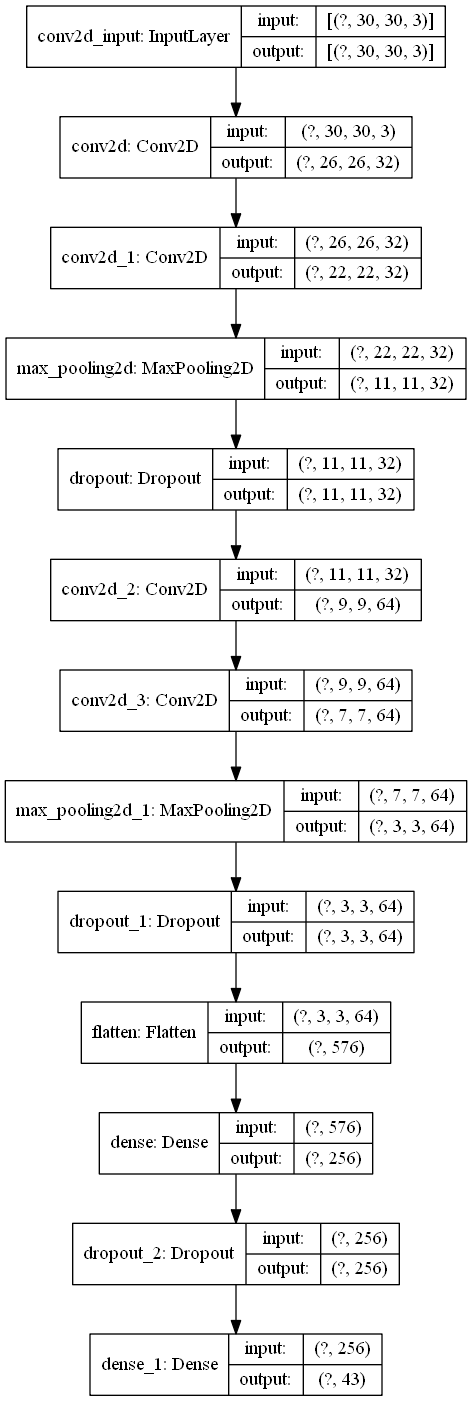

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=a3c45a2c8571ba37c1fe767fb0ea935917ca2016ac21ff97011fb89028bcb144
  Stored in directory: c:\users\sahib\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [62]:
os.chdir("..")
os.chdir("Saved Weights/")

In [63]:
os.getcwd()

'C:\\Users\\sahib\\OneDrive\\Desktop\\CB_ML\\Traffic Sign Detection project\\Saved Weights'

In [64]:
epochs = 25
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs,validation_data=(x_test, y_test))
model.save('traffic_recognition.h5')

Epoch 1/25
491/491 [==============================] - 6s 13ms/step - loss: 2.6142 - accuracy: 0.3353 - val_loss: 1.2111 - val_accuracy: 0.6831
Epoch 2/25
491/491 [==============================] - 6s 11ms/step - loss: 1.2126 - accuracy: 0.6473 - val_loss: 0.6901 - val_accuracy: 0.7942
Epoch 3/25
491/491 [==============================] - 6s 12ms/step - loss: 0.8287 - accuracy: 0.7467 - val_loss: 0.3751 - val_accuracy: 0.9063
Epoch 4/25
491/491 [==============================] - 6s 11ms/step - loss: 0.6323 - accuracy: 0.8068 - val_loss: 0.3246 - val_accuracy: 0.9110
Epoch 5/25
491/491 [==============================] - 6s 11ms/step - loss: 0.5041 - accuracy: 0.8468 - val_loss: 0.1950 - val_accuracy: 0.9471
Epoch 6/25
491/491 [==============================] - 6s 11ms/step - loss: 0.4346 - accuracy: 0.8675 - val_loss: 0.1713 - val_accuracy: 0.9538
Epoch 7/25
491/491 [==============================] - 6s 12ms/step - loss: 0.3851 - accuracy: 0.8833 - val_loss: 0.1232 - val_accuracy: 0.9662

### Plotting Accuracy & Loss

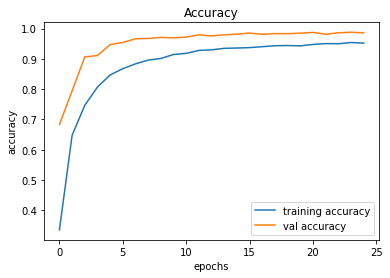

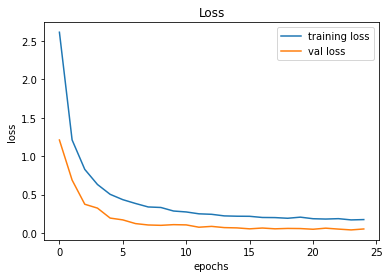

In [65]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Testing the model

In [145]:

y_test = pd.read_csv(Path  + '\\Test.csv')
labels = y_test['ClassId'].values
img_paths = y_test['Path'].values
test_data=[]
for img_path in img_paths:
      img_path = os.path.join(Path,img_path)
      image = Image.open(img_path)
      image = image.resize((30,30))
      test_data.append(np.array(image))
test_data = np.array(test_data)
pred = model.predict_classes(test_data)
#Accuracy with the test data

print(accuracy_score(labels, pred))

0.956215360253365


### Model has 95% Accuracy on Test cases

### Load the trained model to classify sign

In [26]:
model.load_weights('traffic_recognition.h5')

### Dictionary to label all traffic signs class

In [85]:
classes = { 1:'Speed limit (20km/h)',
    2:'Speed limit (30km/h)',
    3:'Speed limit (50km/h)',
    4:'Speed limit (60km/h)',
    5:'Speed limit (70km/h)',
    6:'Speed limit (80km/h)',
    7:'End of speed limit (80km/h)',
    8:'Speed limit (100km/h)',
    9:'Speed limit (120km/h)',
    10:'No passing',
    11:'No passing veh over 3.5 tons',
    12:'Right-of-way at intersection',
    13:'Priority road',
    14:'Yield',
    15:'Stop',
    16:'No vehicles',
    17:'Veh > 3.5 tons prohibited',
    18:'No entry',
    19:'General caution',
    20:'Dangerous curve left',
    21:'Dangerous curve right',
    22:'Double curve',
    23:'Bumpy road',
    24:'Slippery road',
    25:'Road narrows on the right',
    26:'Road work',
    27:'Traffic signals',
    28:'Pedestrians',
    29:'Children crossing',
    30:'Bicycles crossing',
    31:'Beware of ice/snow',
    32:'Wild animals crossing',
    33:'End speed + passing limits',
    34:'Turn right ahead',
    35:'Turn left ahead',
    36:'Ahead only',
    37:'Go straight or right',
    38:'Go straight or left',
    39:'Keep right',
    40:'Keep left',
    41:'Roundabout mandatory',
    42:'End of no passing',
    43:'End no passing veh > 3.5 tons' }


### Function To plot Image

In [34]:
def plot_img(img,sign):
    plt.imshow(img.reshape(-1,30,3))
    plt.xlabel(sign)
    plt.show()

### Testing model on test X_test

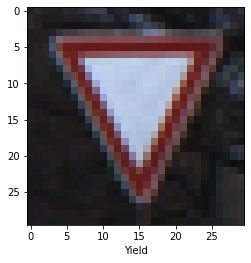

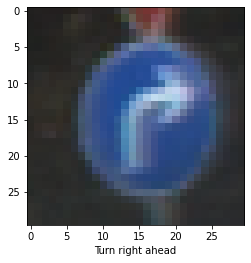

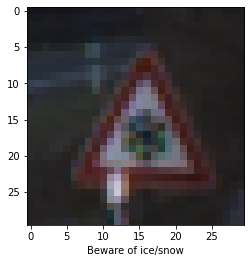

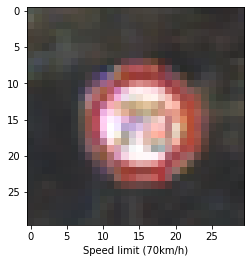

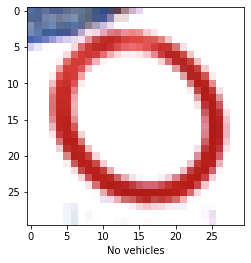

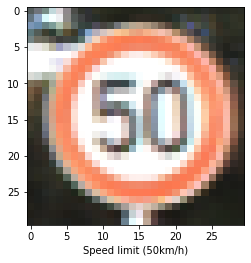

In [35]:
for i in range(6):
    num = random.randint(0,x_test.shape[0])
    
    img = x_test[num].reshape(-1,30,30,3)
    #print(img.shape)
    pred = model.predict_classes(img)[0]
    sign = classes[pred+1]
    plot_img(img,sign)


## Testing Model on Traffic Signs from google

In [128]:
def classify(file_path):
    image = Image.open(file_path)
    image = image.convert("RGB")
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    plot_img(image,sign)


In [3]:
for el in glob.glob('./my_sign images/*.jpg') + glob.glob('./my_sign images/*.png'):
    print(el)
    classify(el)
    
#plt.savefig('new_images.png',bbox_inches='tight')

./my_sign images\001.jpg


NameError: name 'classify' is not defined